In [ ]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [ ]:
alexnet = models.AlexNet()


In [ ]:
resnet = models.resnet101(pretrained=True)
resnet

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving dog.jpg to dog (5).jpg


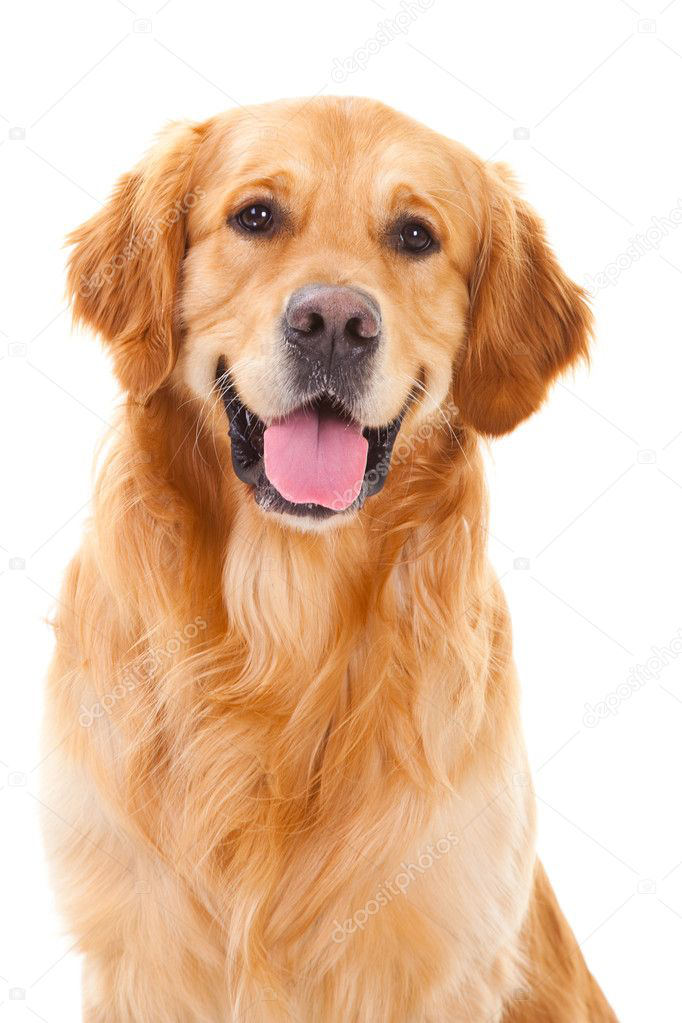

In [ ]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("dog.jpg")
img

In [ ]:
img_t = preprocess(img)

In [ ]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.4888e+00,  6.9289e-01, -2.0860e+00, -3.7410e+00, -3.9437e+00,
         -1.9507e+00, -3.6138e+00, -2.1769e+00, -2.9358e-02, -4.7945e+00,
         -8.9381e-01, -1.0004e+00, -3.5007e-01, -2.9970e+00, -2.5007e+00,
          4.0646e-01, -3.0839e-01, -3.9899e-01, -1.0709e+00, -9.3367e-01,
         -3.6318e+00, -2.7022e+00, -1.4993e+00,  6.7261e-01, -1.1757e+00,
         -1.0110e+00, -2.3783e+00, -1.9044e-01, -1.4581e+00, -2.2777e+00,
         -2.2066e+00, -2.8860e+00, -2.5110e+00, -2.9516e+00, -2.1432e+00,
         -4.0810e+00, -1.3336e+00, -2.3646e+00, -8.6022e-01, -4.4440e-01,
         -1.2830e-01, -4.1684e-01,  1.4451e+00, -1.8747e+00, -1.6831e+00,
         -1.4903e+00,  1.3051e+00, -1.0838e+00, -2.9451e+00, -2.7526e+00,
         -2.8253e+00, -1.8989e+00, -2.6161e+00, -2.0297e+00, -2.7285e+00,
         -1.9908e+00, -1.0386e+00, -1.6786e+00, -3.2486e+00, -7.9078e-01,
         -6.7419e-01, -3.0690e+00, -1.6953e+00, -3.3571e+00, -3.0595e+00,
         -3.7299e+00, -2.6648e+00, -1.

In [ ]:
with open('/images/imagenet.txt') as f:
    labels = [line.strip() for line in f.readlines()] 
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("207: 'golden retriever',", 98.26549530029297)